##  Bank Data Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("bankfull.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.shape

(45211, 17)

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

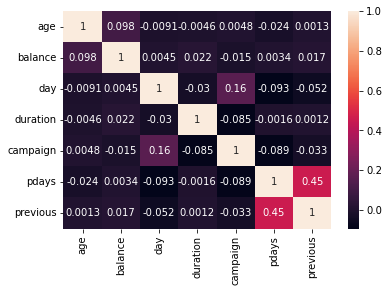

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

df.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
oe=OrdinalEncoder()

obj_enc=df.select_dtypes(object).columns
obj_enc=obj_enc.drop('y')

In [14]:
obj_enc

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [15]:
calcols=obj_enc.copy()

In [16]:
df[calcols]=oe.fit_transform(df[calcols])

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,no
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,no
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,no
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,no
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,yes
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,yes
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,yes
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,no


In [18]:
le=LabelEncoder()

df["y"]=le.fit_transform(df["y"])

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0


In [20]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest(random_state=10,contamination="auto")
out=iso.fit_predict(df)

In [21]:
df["outliers"]=out

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outliers
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0,1
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0,1
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0,1
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0,1
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1,1
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1,-1
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1,-1
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0,1


In [23]:
df["outliers"].value_counts()

 1    35590
-1     9621
Name: outliers, dtype: int64

In [45]:
# Dropping The ouliers and selecting the normall data points

new_df=df[df["outliers"]== 1]

In [25]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outliers
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0,1
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0,1
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0,1
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0,1
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4.0,1.0,2.0,0.0,1428,0.0,0.0,0.0,16,9.0,333,2,-1,0,3.0,0,1
45202,34,0.0,2.0,1.0,0.0,557,0.0,0.0,0.0,17,9.0,224,1,-1,0,3.0,1,1
45203,23,8.0,2.0,2.0,0.0,113,0.0,0.0,0.0,17,9.0,266,1,-1,0,3.0,1,1
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1,1


In [26]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outliers
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0,1
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0,1
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0,1
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0,1
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0,1


In [27]:
new_df=new_df.drop("outliers",axis=1)

In [28]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4.0,1.0,2.0,0.0,1428,0.0,0.0,0.0,16,9.0,333,2,-1,0,3.0,0
45202,34,0.0,2.0,1.0,0.0,557,0.0,0.0,0.0,17,9.0,224,1,-1,0,3.0,1
45203,23,8.0,2.0,2.0,0.0,113,0.0,0.0,0.0,17,9.0,266,1,-1,0,3.0,1
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1


In [29]:
x=new_df.iloc[:,:-1]
y=x=new_df.iloc[:,-1]

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45198    0
45202    1
45203    1
45206    1
45209    0
Name: y, Length: 35590, dtype: int32

In [31]:
new_df.iloc[:,:-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4.0,1.0,2.0,0.0,1428,0.0,0.0,0.0,16,9.0,333,2,-1,0,3.0
45202,34,0.0,2.0,1.0,0.0,557,0.0,0.0,0.0,17,9.0,224,1,-1,0,3.0
45203,23,8.0,2.0,2.0,0.0,113,0.0,0.0,0.0,17,9.0,266,1,-1,0,3.0
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0


In [32]:
x

0        0
1        0
2        0
3        0
4        0
        ..
45198    0
45202    1
45203    1
45206    1
45209    0
Name: y, Length: 35590, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((24913,), (10677,), (24913,), (10677,))

In [34]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(pd.DataFrame(xtrain))
xtest=sc.transform(pd.DataFrame(xtest))

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg = LogisticRegression()

In [37]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10141
           1       1.00      1.00      1.00       536

    accuracy                           1.00     10677
   macro avg       1.00      1.00      1.00     10677
weighted avg       1.00      1.00      1.00     10677



In [40]:
confusion_matrix(ytest,ypred)

array([[10141,     0],
       [    0,   536]], dtype=int64)

In [42]:
accuracy_score(ytest,ypred)

1.0